In [2]:

# Importing the libraries
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

import shap
from alibi.explainers import KernelShap

In [3]:
# Importing the dataset
data = pd.read_excel('Biodiesel Data_Jahirul_2.xlsx',sheet_name = 'OS')


In [4]:
data.head()
#data.shape
#type(data)

,C14:0,C16:0,C18:1,C18:2,C18:3,C20:1,C22:1,O%,H%,ACL,ANDB,Saturation (wt%),MOUSAF,PUSAF,Oxidation stability,OS,OS_EN
0,0.0,4.40,20.70,15.90,54.60,0.00,0.0,10.90090,11.49950,17.934000,2.176056,8.80,20.70,70.50,0.2,0,0
1,0.0,5.30,16.60,13.70,62.10,0.00,0.0,10.92770,11.41210,17.892000,2.304000,7.50,16.70,75.80,0.2,0,0
2,0.0,5.18,19.04,16.12,54.54,0.07,0.2,10.77317,11.33802,17.908409,2.185260,8.63,19.41,70.66,0.4,0,0
3,0.0,3.56,10.57,14.64,59.20,0.90,0.0,9.97964,10.39886,17.941852,2.386600,6.18,11.47,73.84,0.4,0,0
4,0.0,6.20,25.20,63.10,0.30,0.20,0.1,10.88030,11.85550,17.921844,1.543984,10.80,25.60,63.40,0.8,0,0


In [5]:
len(data)

217

In [6]:
X = data.drop(labels= ['Oxidation stability','OS','ACL','ANDB','Saturation (wt%)','MOUSAF','PUSAF','OS_EN','O%','H%'], axis=1)
y = data['OS_EN']


In [7]:
# Descriptive statistics for each column
y.describe()

count    217.000000
mean       0.511521
std        0.501023
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: OS_EN, dtype: float64

In [8]:
X.describe()

,C14:0,C16:0,C18:1,C18:2,C18:3,C20:1,C22:1
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000
mean,0.594332,14.806866,40.352765,27.479401,6.364747,0.442120,0.584977
std,2.020450,10.458299,19.402888,18.054380,12.026705,1.658024,3.308917
min,0.000000,0.900000,3.100000,0.700000,0.000000,0.000000,0.000000
25%,0.000000,6.200000,25.200000,12.700000,0.500000,0.000000,0.000000
50%,0.050000,11.810000,39.100000,23.290000,2.090000,0.000000,0.000000
75%,0.550000,19.920000,53.050000,40.610000,7.100000,0.120000,0.000000
max,18.740000,47.200000,82.000000,77.250000,62.100000,10.700000,25.600000


In [9]:
# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


<AxesSubplot:>

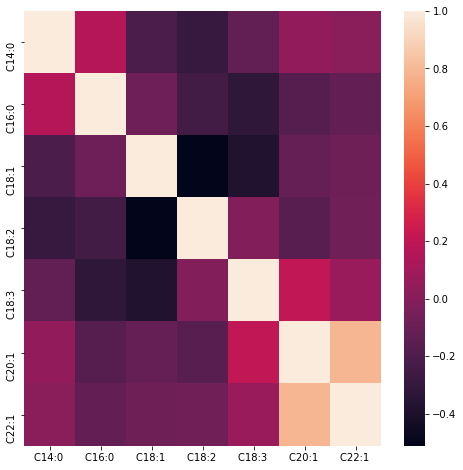

In [10]:
#Idenitfy corelated independent variables through heatmap
corrmat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(8,8)
sns.heatmap(corrmat)

In [11]:
X_train.count()

C14:0     173
C16:0     173
C18:1     173
C18:2     173
C18:3     173
C20:1     173
C22:1     173
dtype: int64

In [12]:

#3 Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)


In [13]:
#lOGREGRESSION
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='liblinear', C=20.0,penalty='l2', tol = 0.001,random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)


from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[15  5]
 [ 6 18]]
              precision    recall  f1-score   support

           0       0.71      0.75      0.73        20
           1       0.78      0.75      0.77        24

    accuracy                           0.75        44
   macro avg       0.75      0.75      0.75        44
weighted avg       0.75      0.75      0.75        44



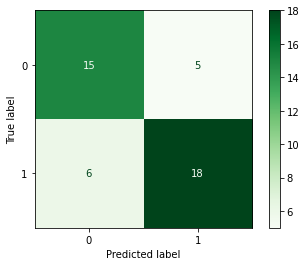

In [14]:
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns

disp = plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Greens)
plt.show()

#sns.heatmap(cm, annot=True,cmap='Oranges')

In [15]:
#KNN

from sklearn.neighbors import KNeighborsClassifier
classifierKNN = KNeighborsClassifier(n_neighbors =3, metric = 'minkowski', p = 2)
classifierKNN.fit(X_train, y_train)

y_pred = classifierKNN.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[16  4]
 [ 9 15]]
              precision    recall  f1-score   support

           0       0.64      0.80      0.71        20
           1       0.79      0.62      0.70        24

    accuracy                           0.70        44
   macro avg       0.71      0.71      0.70        44
weighted avg       0.72      0.70      0.70        44



In [16]:
# Fitting Support Vector classifier to the Training set

from sklearn.svm import SVC
classifierSVC = SVC(kernel = 'poly', C=20, random_state = 0, probability = True)
classifierSVC.fit(X_train, y_train)

y_predSVC = classifierSVC.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_predSVC)
print(cm)
accuracy_score(y_test, y_predSVC)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_predSVC))

[[17  3]
 [ 7 17]]
              precision    recall  f1-score   support

           0       0.71      0.85      0.77        20
           1       0.85      0.71      0.77        24

    accuracy                           0.77        44
   macro avg       0.78      0.78      0.77        44
weighted avg       0.79      0.77      0.77        44



In [17]:
# Fitting DT classifier to the Training set

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

clfDT = DecisionTreeClassifier(max_depth=6,criterion='entropy',
    splitter='best', random_state=0)
clfDT.fit(X_train, y_train)

y_predDT = clfDT.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_predDT)
print(cm)


from sklearn.metrics import classification_report
print(classification_report(y_test, y_predDT))

[[17  3]
 [10 14]]
              precision    recall  f1-score   support

           0       0.63      0.85      0.72        20
           1       0.82      0.58      0.68        24

    accuracy                           0.70        44
   macro avg       0.73      0.72      0.70        44
weighted avg       0.74      0.70      0.70        44



# Optimized SVC and DT via Grid Seacrh

In [26]:
#Grid Search for SVC

from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=22)
model = SVC()
param_grid = {'C': [0.1, 1, 10], 
              'gamma': [1, 0.1, 0.01],
             'kernel': ['linear','poly','rbf']} 


tuning = GridSearchCV(estimator=model, 
                          param_grid = param_grid,
                          cv=3,
                          verbose=1,
                          n_jobs=-1)
    
tuning.fit(X_train, y_train)

print("Best parameters:")
print(tuning.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed: 11.7min finished


Best parameters:
{'C': 1, 'gamma': 0.01, 'kernel': 'poly'}


In [19]:
from sklearn.svm import SVC
classifierSVC = SVC(kernel = 'poly', C=1, gamma= 0.01, random_state = 0)
classifierSVC.fit(X_train, y_train)

y_predSVC = classifierSVC.predict(X_test)

cm = confusion_matrix(y_test, y_predSVC)
print(cm)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_predSVC))

[[ 0 20]
 [ 0 24]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.55      1.00      0.71        24

    accuracy                           0.55        44
   macro avg       0.27      0.50      0.35        44
weighted avg       0.30      0.55      0.39        44



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


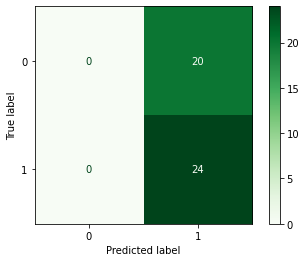

In [20]:
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns

disp = plot_confusion_matrix(classifierSVC, X_test, y_test, cmap=plt.cm.Greens)
plt.show()

#plt.savefig("SVC_CM_ASTM.png",dpi=300)

In [ ]:
#Grid Search for DT

from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=22)
model =  DecisionTreeClassifier()
param_grid = {'criterion': ['gini','entropy'], 
              'max_depth': range(1,10),
              'min_samples_split': range(1,5),
            'min_samples_leaf': range(1,5)} 


tuning = GridSearchCV(estimator=model, 
                          param_grid = param_grid,
                          cv=3,
                          verbose=1,
                          n_jobs=-1)
    
tuning.fit(X_train, y_train)

print("Best parameters:")
print(tuning.best_params_)

In [27]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=5,criterion='gini',
    min_samples_leaf = 1, min_samples_split = 2, random_state=0)

clf.fit(X_train, y_train)

y_predDT = clf.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_predDT)
print(cm)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_predDT))

[[16  4]
 [10 14]]
              precision    recall  f1-score   support

           0       0.62      0.80      0.70        20
           1       0.78      0.58      0.67        24

    accuracy                           0.68        44
   macro avg       0.70      0.69      0.68        44
weighted avg       0.70      0.68      0.68        44



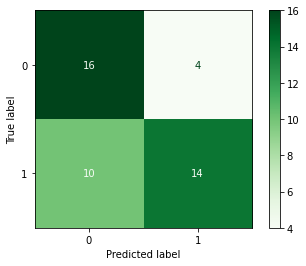

In [28]:
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns

disp = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Greens)
plt.show()

#plt.savefig("DT_CM_EN.png",dpi=300)

# Perform Causal analytics - Accumulated Local Effects

In [22]:
names= data.columns[0:7]
names

Index(['C14:0 ', 'C16:0 ', 'C18:1 ', 'C18:2 ', 'C18:3 ', 'C20:1 ', 'C22:1 '], dtype='object')

In [23]:
from alibi.explainers import ALE, plot_ale

In [24]:
svc_ale = ALE(classifierSVC.predict, feature_names = X_train.columns, target_names = ['OS_EN'])
SVC_exp = svc_ale.explain(np.array(X_train))

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

No handles with labels found to put in legend.


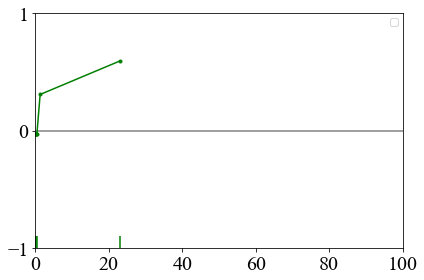

In [35]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from cycler import cycler
matplotlib.rcParams['font.sans-serif'] = 'Times New Roman'
matplotlib.rcParams['axes.prop_cycle'] =  cycler(color =['g'])


label_size = 20
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size 


#matplotlib.rcParams['legend.loc'] = []

tick_spacing = 1

fig, ax = plt.subplots()

plot_ale(SVC_exp,features = ['C22:1 '],ax=ax,line_kw={'label':'_nolegend_'})
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xlim([0, 100])
ax.set_ylim([-1, 1])
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

#plt.savefig("OS_22_1.png",dpi=300)

# Perform optimization - Prescriptive analytics

In [39]:
from pyswarm import pso

In [71]:
def objective(x):
    x1=x[0]
    x2=x[1]
    x3=x[2]
    x4=x[3]
    x5=x[4]
    x6=x[5]
    x7=x[6]
    
   
    sum = 100-(x[0]+x[1]+x[2]+x[3]+x[4]+x[5]+x[6])
    
    if sum >3:
        CV = 1000000000000
    elif sum <-1:
        CV = 1000000000000
    else:
        CV = 0  
    
    X_optPSO = np.array ([x1,x2,x3,x4,x5,x6,x7]).reshape(1, -1)
    constraint_violoation = CV
    
    y_predoptPSO = classifierSVC.predict(X_optPSO)
    return -(y_predoptPSO)+ constraint_violoation
    

lb = [2, 0, 0, 0,  0 ,0, 1]
ub = [17, 5, 70,40, 15, 3,4]
      

#Run multiple rounds of optimization to get a decent sense of the values 
for fopt in range(10):
    xopt, fopt = pso(objective, lb, ub, maxiter=200)
    total = np.sum(xopt)
    
    print(xopt, fopt)
    print(total)
 

Stopping search: maximum iterations reached --> 200
[1.29200653e+01 3.94338376e-02 6.09041258e+01 1.05797698e+01
 1.24851937e+01 1.77128581e+00 1.48496675e+00] -1.0
100.18484095111242
Stopping search: maximum iterations reached --> 200
[16.93379664  3.69415282 45.2675835  24.26505826  3.74026311  1.42763964
  2.20960198] -1.0
97.538095944401
Stopping search: maximum iterations reached --> 200
[ 5.48370692  1.14693452 58.71715588 28.35391203  1.29531738  0.47048462
  3.03093531] -1.0
98.49844666626855
Stopping search: maximum iterations reached --> 200
[ 8.31966157  1.42119862 47.97774222 37.71074975  1.02564379  0.11456499
  2.23990034] -1.0
98.80946126717691
Stopping search: maximum iterations reached --> 200
[10.41466392  4.78197599 52.85023799 15.37796802 11.31280218  0.22134397
  2.31606416] -1.0
97.27505621728012
Stopping search: maximum iterations reached --> 200
[16.85258136  2.9886654  30.45540817 39.5282714   5.55385853  0.85204602
  1.24548318] -1.0
97.47631405421563
Stopping